### Created on 2023
### @author: S.W

### 1. 학습에 필요한 라이브러리 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.optim as optim

import PIL
import matplotlib 
import matplotlib.pyplot as plt

### 2. MNIST 데이터 불러오기

#### 효과적인 이미지 전처리를 위해 pytorch에서 제공하는 transform 클래스

- https://pytorch.org/vision/stable/transforms.html

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), # 데이터 타입을 tensor 타입으로 변경
     transforms.Normalize((0.5,), (0.5,)), # 데이터 정규화(정규분포)
    ])

#### pytorch에서 불러올 수 있는 내장 데이터 셋 목록
- https://pytorch.org/vision/stable/datasets.html

In [3]:
# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

C:\Users\sangwoo\anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
C:\Users\sangwoo\anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before conv

In [4]:
train_features, train_labels = next(iter(trainloader))

print("이미지 형태 :", train_features[0].shape, "\n매핑되는 출력값 :",train_labels[0])

이미지 형태 : torch.Size([1, 28, 28]) 
매핑되는 출력값 : tensor(7)
이미지 형태 : torch.Size([1, 28, 28]) 
매핑되는 출력값 : tensor(7)


AxesImage(80,52.8;496x369.6)
숫자:  tensor(7)
AxesImage(80,52.8;496x369.6)
숫자:  tensor(7)


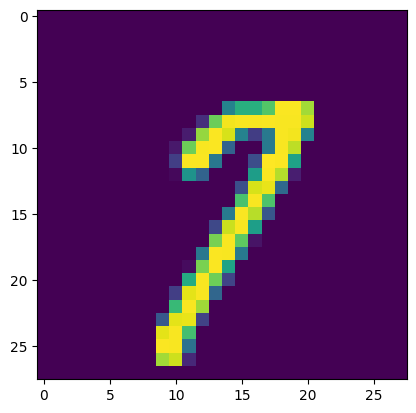

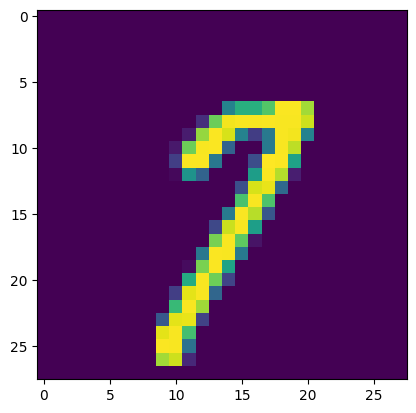

In [5]:
n = 0
img = torch.squeeze(train_features[n]).numpy() # 0번째 차원 제거 및 torch → numpy 형태로 변환

print(plt.imshow(img))
print("숫자: ",train_labels[n])

### 3. CNN 모델 구성

In [6]:
# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
print(net) # pytorch는 print()를 이용해서 모델의 구조를 알 수 있다.

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)
Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
from torchsummary import summary

summary(net.cuda(), (1, 28, 28)) # torchsummary라는 라이브러리에 tensorflow의 summary와 유사한 함수가 있다.

C:\Users\sangwoo\anaconda3\envs\pytorch-gpu\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
C:\Users\sangwoo\anaconda3\envs\pytorch-gpu\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
         MaxPool2d-2           [-1, 32, 13, 13]               0
            Conv2d-3           [-1, 64, 11, 11]          18,496
         MaxPool2d-4             [-1, 64, 5, 5]               0
            Linear-5                   [-1, 64]         102,464
            Linear-6                   [-1, 10]             650
Total params: 121,930
Trainable params: 121,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.28
Params size (MB): 0.47
Estimated Total Size (MB): 0.75
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 2

### 4. 모델 학습

In [8]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

# Train the model
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터 불러오기
        inputs, labels = data

        # 순전파 진행.
        outputs = net(inputs.cuda()).cuda()
        loss = criterion(outputs, labels.cuda()) # 손실함수 값 계산
        
        # 역전파 진행
        optimizer.zero_grad() # 역전파를 진행하기 전 gradient를 0으로 바꿈.
        loss.backward()
        optimizer.step() # 모델 파라미터 업데이트

        # 손실함수 값 저장
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

[1,   200] loss: 0.442
[1,   200] loss: 0.442
[1,   400] loss: 0.123
[1,   400] loss: 0.123
[1,   600] loss: 0.088
[1,   600] loss: 0.088
[1,   800] loss: 0.072
[1,   800] loss: 0.072
[2,   200] loss: 0.060
[2,   200] loss: 0.060
[2,   400] loss: 0.049
[2,   400] loss: 0.049
[2,   600] loss: 0.049
[2,   600] loss: 0.049
[2,   800] loss: 0.044
[2,   800] loss: 0.044
[3,   200] loss: 0.034
[3,   200] loss: 0.034
[3,   400] loss: 0.038
[3,   400] loss: 0.038
[3,   600] loss: 0.034
[3,   600] loss: 0.034
[3,   800] loss: 0.038
[3,   800] loss: 0.038
[4,   200] loss: 0.028
[4,   200] loss: 0.028
[4,   400] loss: 0.024
[4,   400] loss: 0.024
[4,   600] loss: 0.027
[4,   600] loss: 0.027
[4,   800] loss: 0.029
[4,   800] loss: 0.029
[5,   200] loss: 0.020
[5,   200] loss: 0.020
[5,   400] loss: 0.017
[5,   400] loss: 0.017
[5,   600] loss: 0.022
[5,   600] loss: 0.022
[5,   800] loss: 0.019
[5,   800] loss: 0.019


### 5. 모델 평가

In [9]:
# Evaluate the model
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        # 데이터 불러오기
        images, labels = data
        
        # 순전파
        outputs = net(images.cuda()).cuda()
        
        # 예측 - 가장 높은 값을 가진 레이블을 가져옴
        _, predicted = torch.max(outputs.data, 1) # 가장 높은 확률 값, 라벨
        
        # 전체 데이터 개수
        total += labels.size(0)
        
        # 정답 개수
        correct += (predicted == labels.cuda()).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 99.080000 %
Accuracy of the network on the 10000 test images: 99.080000 %
